In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import cv2
import os
import random
import glob

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepcontractor/musical-instrument-chord-classification")

print("Path to dataset files:", path)

100%|██████████| 135M/135M [00:01<00:00, 113MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2


In [ ]:
!ls -l /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files

total 36
drwxr-xr-x 2 root root 20480 Nov 30 20:36 Major
drwxr-xr-x 2 root root 16384 Nov 30 20:36 Minor


In [ ]:
"""
loads the audio file into 2 variables: y: raw audio signal as a NumPy array.
its shape is (49613,), which means there are 49,613 audio samples in this file
sr: sample rate: 22050 Hz (common for many audio files)
"""
y,sr = librosa.load('/root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/Major/Major_6.wav')

In [ ]:
print(y.shape)

(49613,)


In [ ]:
print(y[:10])

[-0.00360443 -0.00573097 -0.00507644 -0.00551882 -0.00545634 -0.00585387
 -0.00580924 -0.00615048 -0.00612194 -0.00628565]


In [ ]:
print(sr)

22050


In [ ]:
# one audio file to spectogram
# computes stft of audio signal: time domain --> freq domain
# now 2D representation: rows: frequency components, columns: time window of audio signal
# default stft is 2048 samples for window size

D = librosa.stft(y)
# amplitude_to_db just converts to dB scale
S = librosa.amplitude_to_db(np.abs(D), ref=np.max)
print(S.shape)
print(type(S))

# 1025 frequency bins which we get from 1048/2 + 1 (only need positive frequencys due to mirroring of FT)
# these 1025 bins are spaced equally from 0-nyquist freq(11025 Hz)
# here 11025 (the nyquist freq) is the highest freq component that can be present in the signal
# 97 time frames in spectogram

(1025, 97)
<class 'numpy.ndarray'>


In [ ]:
"""
images typically use 8 bit ints to represent pixel vals, so we noramlize
from 0 to 255
"""
audioAsImage = (S * 255).astype(np.uint8)
print(audioAsImage.shape)
print(type(audioAsImage))
print(audioAsImage)

(1025, 97)
<class 'numpy.ndarray'>
[[200 146 171 ... 148  86   4]
 [ 73  81  24 ... 222  28   9]
 [  9  65  91 ... 202  50  24]
 ...
 [ 80  80  80 ...  80  80  80]
 [ 80  80  80 ...  80  80  80]
 [ 80  80  80 ...  80  80  80]]


In [ ]:
# cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Audio_Files/Major/Major_6.wav.png', audioAsImage)
cv2.imwrite('/root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/Major/Major_6.wav.png', audioAsImage)

True

In [ ]:
# making all the audio files represented as images for major chords

#input_path = '/content/drive/My Drive/Colab Notebooks/Audio_Files/New/Major'
# output_path = '/content/drive/My Drive/Colab Notebooks/Audio_Files/New/Major_Images'
output_path = '/root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Major_Images'

isExist = os.path.exists(output_path)
if not isExist:
    os.makedirs(output_path)

# Create output directory if it does not exist
#os.makedirs(output_path, exist_ok=True)

# Get list of all WAV files in the input directory
majorAudioFiles = glob.glob('/root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/Major/' + '/*.wav')
print(f"Found {len(majorAudioFiles)} audio files.")

# Loop through each file and process it
for file in majorAudioFiles:
    #print(f"Processing file: {file}")

    try:
        # Load the audio file
        y, sr = librosa.load(file)

        if len(y) == 0:
            print(f"Warning: The file {file} is empty or cannot be read.")
            continue

        # Compute the STFT and convert to amplitude in dB
        D = librosa.stft(y)
        S = librosa.amplitude_to_db(np.abs(D), ref=np.max)

        # Debug: Print min and max values of S
        #print(f"Spectrogram values (dB): min={S.min()}, max={S.max()}")

        # Normalize the values to 0-255
        # Convert to uint8 for saving as an image
        image = (S*255).astype(np.uint8)

        # Create a filename for the image
        base_filename = os.path.basename(file).replace('.wav', '.png')
        save_path = os.path.join(output_path, base_filename)

        # Save the image
        success = cv2.imwrite(save_path, image)

        # Check and print the success status
        if success:
            print(f"Image successfully saved to {save_path}")
            print("shape:", str(image.shape))
        else:
            print(f"Failed to save the image for file {file}")

    except Exception as e:
        # Catch any exceptions and print the error
        print(f"Error processing file {file}: {e}")

print("Processing complete.")


Found 502 audio files.
Image successfully saved to /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Major_Images/Major_57.png
shape: (1025, 95)
Image successfully saved to /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Major_Images/Major_81.png
shape: (1025, 95)
Image successfully saved to /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Major_Images/Major_491.png
shape: (1025, 97)
Image successfully saved to /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Major_Images/Major_376.png
shape: (1025, 97)
Image successfully saved to /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Major_Images/Major_279.png
shape: (1025, 97)
Image successfully saved to /root/.cache/kag

In [ ]:
# making all the audio files represented as images for minor

# output_path = '/content/drive/My Drive/Colab Notebooks/Audio_Files/New/Minor_Images'
output_path = '/root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Minor_Images'

isExist = os.path.exists(output_path)
if not isExist:
    os.makedirs(output_path)

# Create output directory if it does not exist
#os.makedirs(output_path, exist_ok=True)

# Get list of all WAV files in the input directory
minorAudioFiles = glob.glob('/root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/Minor/' + '/*.wav')
print(f"Found {len(minorAudioFiles)} audio files.")

# Loop through each file and process it
for file in minorAudioFiles:
    print(f"Processing file: {file}")

    try:
        # Load the audio file
        y, sr = librosa.load(file)

        if len(y) == 0:
            print(f"Warning: The file {file} is empty or cannot be read.")
            continue

        # Compute the STFT and convert to amplitude in dB
        D = librosa.stft(y)
        S = librosa.amplitude_to_db(np.abs(D), ref=np.max)

        # Debug: Print min and max values of S
        #print(f"Spectrogram values (dB): min={S.min()}, max={S.max()}")

        # Normalize the values to 0-255
        # Convert to uint8 for saving as an image
        image = (S*255).astype(np.uint8)

        # Create a filename for the image
        base_filename = os.path.basename(file).replace('.wav', '.png')
        save_path = os.path.join(output_path, base_filename)

        # Save the image
        success = cv2.imwrite(save_path, image)

        # Check and print the success status
        if success:
            print(f"Image successfully saved to {save_path}")
            print("shape:", str(image.shape))
        else:
            print(f"Failed to save the image for file {file}")

    except Exception as e:
        # Catch any exceptions and print the error
        print(f"Error processing file {file}: {e}")

print("Processing complete.")

Found 357 audio files.
Processing file: /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/Minor/Minor_162.wav
Image successfully saved to /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Minor_Images/Minor_162.png
shape: (1025, 100)
Processing file: /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/Minor/Minor_145.wav
Image successfully saved to /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Minor_Images/Minor_145.png
shape: (1025, 95)
Processing file: /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/Minor/Minor_51.wav
Image successfully saved to /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Minor_Images/Minor_5

Image shape: (1025, 97, 3)


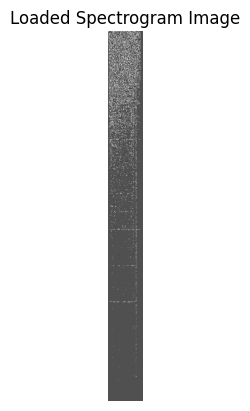

In [ ]:
# test one image
import matplotlib.pyplot as plt

# Read the image from Google Drive
img = cv2.imread('/root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Minor_Images/Minor_35.png')

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found or failed to load.")
else:
    # Print the shape of the image
    print(f"Image shape: {img.shape}")

    # Convert the image from BGR to RGB (since OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Use matplotlib to display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.title('Loaded Spectrogram Image')
    plt.show()

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/Audio_Files/New/Minor_Images'

total 15946
-rw------- 1 root root 48913 Nov 30 20:48 Minor_0.png
-rw------- 1 root root 49499 Nov 30 20:48 Minor_100.png
-rw------- 1 root root 35187 Nov 30 20:48 Minor_101.png
-rw------- 1 root root 51123 Nov 30 20:48 Minor_102.png
-rw------- 1 root root 37838 Nov 30 20:48 Minor_103.png
-rw------- 1 root root 48776 Nov 30 20:48 Minor_104.png
-rw------- 1 root root 30818 Nov 30 20:48 Minor_105.png
-rw------- 1 root root 50677 Nov 30 20:48 Minor_106.png
-rw------- 1 root root 35166 Nov 30 20:48 Minor_107.png
-rw------- 1 root root 49626 Nov 30 20:48 Minor_108.png
-rw------- 1 root root 38856 Nov 30 20:48 Minor_109.png
-rw------- 1 root root 53545 Nov 30 20:48 Minor_10.png
-rw------- 1 root root 51959 Nov 30 20:48 Minor_110.png
-rw------- 1 root root 38797 Nov 30 20:48 Minor_111.png
-rw------- 1 root root 50726 Nov 30 20:48 Minor_112.png
-rw------- 1 root root 36706 Nov 30 20:48 Minor_113.png
-rw------- 1 root root 52264 Nov 30 20:48 Minor_114.png
-rw------- 1 root root 44505 Nov 30 20:

In [ ]:
!cp /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Major_Images/* '/content/drive/My Drive/Colab Notebooks/Audio_Files/New/Major_Images'

In [ ]:
!cp /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/New/Minor_Images/* '/content/drive/My Drive/Colab Notebooks/Audio_Files/New/Minor_Images'

In [ ]:
!cp /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/Major/* '/content/drive/My Drive/Colab Notebooks/Audio_Files/Major'

In [ ]:
!cp /root/.cache/kagglehub/datasets/deepcontractor/musical-instrument-chord-classification/versions/2/Audio_Files/Minor/* '/content/drive/My Drive/Colab Notebooks/Audio_Files/Minor'